___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

In [5]:
jogadas = []
for i in range(1000):
    jogadas.append(randint(1,7))

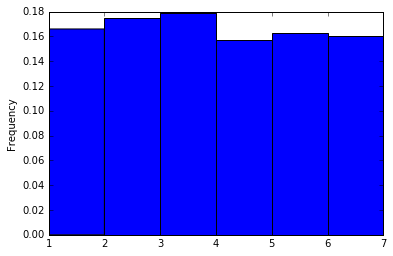

In [6]:
pd.Series(jogadas).plot.hist(bins=[1,2,3,4,5,6,7],normed=1)

### A)

    Todas as faces tem aproximadamente as mesmas probabilidades de cairem nelas

### B)

    A probabilidade não é igual a teórica pois a teórica lida com um mundo ideal, o que não é algo possível na vida real, fazendo com que vários fatores externos possam influenciar nas jogadas.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [33]:
prob_7 = 1 * 1/6
print(prob_7)

0.16666666666666666


### A)
   
    A probabilidade de cair soma 7 é de 1/6

In [33]:
prob_7 = 1 * 1/6
print(prob_7)

0.16666666666666666


### B)
    
    A probabilidade de cair soma 7 continua sendo 1/6 pois o fato de saber o valor do primeiro dado não influencia em nada a probabilidade do valor que tem que sair no segundo dados.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [68]:
ganhos=[]
for i in range(10000):
    porta_premiada = randint(1,4)
    porta_escolhida = randint(1,4)
    porta_aberta = randint(1,4)
    while True:
        if porta_aberta==porta_premiada or porta_aberta==porta_escolhida:
            porta_aberta = randint(1,4)
        else:
            break
            
    nova_escolha = randint(1,4)
    while True:
        if nova_escolha==porta_escolhida or nova_escolha==porta_aberta:
            nova_escolha = randint(1,4)
        else:
            break
    if nova_escolha==porta_premiada:
        ganhos.append(1)

total = sum(ganhos)
print('O indivíduo ganhou',total,'vezes ao trocar de porta')
print()
print('A probabilidade de ganhar ao trocar de porta é:',total*100/10000,'%')
print('O valor teórico da probabilidade é de 66,67%')

O indivíduo ganhou 6588 vezes ao trocar de porta

A probabilidade de ganhar ao trocar de porta é: 65.88 %
O valor teórico da probabilidade é de 66,67%
